# Plot contributions to warming from emissions

Data from IPCC, Sixth Assessment Report, Summary for Policymakers fig 2c:

Szopa, S.; Smith, C.; Blichner, S.; Berntsen, T.; Collins, B.; Gillett, N.; Thorne, P.; Trewin, B. (2021): Summary for Policymakers of the Working Group I Contribution to the IPCC Sixth Assessment Report - data for Figure SPM.2 (v20210809). NERC EDS Centre for Environmental Data Analysis, 09 August 2021. doi:10.5285/c1eb6dad1598427f8f9f3eae346ece2f. http://dx.doi.org/10.5285/c1eb6dad1598427f8f9f3eae346ece2f

Accessed 05.09.2022

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as pl

In [2]:
os.makedirs('../plots/', exist_ok=True)

In [3]:
pl.rcParams['figure.figsize'] = (9/2.54, 8/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = False
pl.rcParams['ytick.left'] = False
pl.rcParams['xtick.top'] = True
pl.rcParams['axes.spines.right'] = False
pl.rcParams['axes.spines.left'] = False
pl.rcParams['ytick.labelleft'] = False
# pl.rcParams['figure.dpi'] = 300  # only for output

In [4]:
#pl.rcParams.keys()

In [5]:
df = pd.read_csv('../data/ipcc-ar6-wg1-spm/SPM2c_data.csv')
df

,Driver,total GSAT effect,5% very likely lower limit,95% very likely upper limit
0,Carbon dioxide (CO_2),0.788254,0.521952,1.247635
1,Methane (CH_4),0.513237,0.294718,0.840575
2,Nitrous oxide (N_2O),0.091731,0.045557,0.155209
3,Halogenated gases (CFC + HCFC + HFC),0.098762,0.005151,0.203464
4,Nitrogen oxides (NO_x),-0.137032,-0.299279,0.011594
5,Volatile organic compounds and carbon monoxide...,0.223527,0.093978,0.391009
6,Sulphur dioxide (SO_2),-0.485553,-0.931216,-0.104174
7,Organic carbon,-0.069498,-0.154982,0.009359
8,Black carbon,0.093069,-0.068966,0.257277
9,Ammonia,-0.014523,-0.023187,-0.009279


In [6]:
# rename columns
df.loc[:, 'Driver'] = ['CO$_2$', 'CH$_4$', 'N$_2$O', 'CFCs + HFCs + HCFCs', 'NO$_x$', 'VOCs + CO', 'SO$_2$',
                    'Organic carbon', 'Black carbon', 'NH$_3$', 'Land use', 'Contrails']

In [7]:
df

,Driver,total GSAT effect,5% very likely lower limit,95% very likely upper limit
0,CO$_2$,0.788254,0.521952,1.247635
1,CH$_4$,0.513237,0.294718,0.840575
2,N$_2$O,0.091731,0.045557,0.155209
3,CFCs + HFCs + HCFCs,0.098762,0.005151,0.203464
4,NO$_x$,-0.137032,-0.299279,0.011594
5,VOCs + CO,0.223527,0.093978,0.391009
6,SO$_2$,-0.485553,-0.931216,-0.104174
7,Organic carbon,-0.069498,-0.154982,0.009359
8,Black carbon,0.093069,-0.068966,0.257277
9,NH$_3$,-0.014523,-0.023187,-0.009279


In [8]:
df.loc[0, 'total GSAT effect']

0.788253696

In [9]:
df.loc[1:, 'total GSAT effect'].sum()

0.25564997399999995

In [10]:
df.loc[1:, 'total GSAT effect'].sum()/df.loc[0:, 'total GSAT effect'].sum()

0.24489805079428456

In [11]:
# sort by temperature contribution
df_sorted = df.sort_values('total GSAT effect', ascending=False).reset_index(drop=True)
df_sorted

,Driver,total GSAT effect,5% very likely lower limit,95% very likely upper limit
0,CO$_2$,0.788254,0.521952,1.247635
1,CH$_4$,0.513237,0.294718,0.840575
2,VOCs + CO,0.223527,0.093978,0.391009
3,CFCs + HFCs + HCFCs,0.098762,0.005151,0.203464
4,Black carbon,0.093069,-0.068966,0.257277
5,N$_2$O,0.091731,0.045557,0.155209
6,Contrails,0.021815,0.007677,0.039767
7,NH$_3$,-0.014523,-0.023187,-0.009279
8,Organic carbon,-0.069498,-0.154982,0.009359
9,Land use,-0.079884,-0.138894,-0.036339


In [12]:
colors = {
    'CO$_2$': '#a0a0a0',
    'non-CO$_2$': '#505050',
    # warming
    'CH$_4$': '#9d3a12', 
    'VOCs + CO': '#cb9154',
    'CFCs + HFCs + HCFCs': '#f7edf0', 
    'Black carbon': '#a5668b',
    'N$_2$O': '#69306d',
    'Contrails': '#49205d',
    # cooling
    'NH$_3$': '#e4dfda', 
    'Organic carbon': '#e1caa8',
    'Land use': '#447604',
    'NO$_x$': '#48a9a6',
    'SO$_2$': '#284882',
}

In [13]:
text_x = {
    'CO$_2$': df_sorted.loc[0, 'total GSAT effect']/2,
    'non-CO$_2$': df_sorted.loc[0, 'total GSAT effect']+df_sorted.loc[1:, 'total GSAT effect'].sum()/2,
    'CH$_4$': df_sorted.loc[1, 'total GSAT effect']/2,
    'SO$_2$': df_sorted.loc[11, 'total GSAT effect']/2,
    'VOCs + CO': df_sorted.loc[1:1, 'total GSAT effect'].sum() + df_sorted.loc[2, 'total GSAT effect']/2,
    'CFCs + HFCs + HCFCs': df_sorted.loc[1:2, 'total GSAT effect'].sum() + df_sorted.loc[3, 'total GSAT effect']/2,
    'Black carbon': df_sorted.loc[1:3, 'total GSAT effect'].sum() + df_sorted.loc[4, 'total GSAT effect']/2,
    'N$_2$O': df_sorted.loc[1:4, 'total GSAT effect'].sum() + df_sorted.loc[5, 'total GSAT effect']/2,
    'Contrails': df_sorted.loc[1:5, 'total GSAT effect'].sum() + df_sorted.loc[6, 'total GSAT effect']/2,
    'NO$_x$': df_sorted.loc[11, 'total GSAT effect'] + df_sorted.loc[10, 'total GSAT effect']/2,
    'Land use': df_sorted.loc[10:11, 'total GSAT effect'].sum() + df_sorted.loc[9, 'total GSAT effect']/2,
    'Organic carbon': df_sorted.loc[9:11, 'total GSAT effect'].sum() + df_sorted.loc[8, 'total GSAT effect']/2,
    'NH$_3$': df_sorted.loc[8:11, 'total GSAT effect'].sum() + df_sorted.loc[7, 'total GSAT effect']/2
}

In [14]:
text_x['N$_2$O']

0.9744602219999999

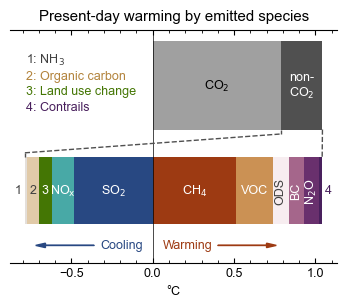

In [17]:
# CO2 and non-CO2
pl.barh(1, df_sorted.loc[0, 'total GSAT effect'], color=colors['CO$_2$'])
pl.barh(1, df_sorted.loc[1:, 'total GSAT effect'].sum(), left=df_sorted.loc[0, 'total GSAT effect'], color=colors['non-CO$_2$'])

# Warming drivers
for index in range(1, 7):
    pl.barh(
        0.05, 
        df_sorted.loc[index, 'total GSAT effect'], 
        left=df_sorted.loc[1:(index-1), 'total GSAT effect'].sum(),
        color=colors[df_sorted.loc[index, 'Driver']], 
        height=0.6
    )
for index in range(11, 6, -1):
    pl.barh(
        0.05, 
        df_sorted.loc[index, 'total GSAT effect'], 
        left=df_sorted.loc[(index+1):11, 'total GSAT effect'].sum(),
        color=colors[df_sorted.loc[index, 'Driver']],
        height=0.6
    )

pl.axvline(0, color='k', lw=0.5)

pl.plot((df_sorted.loc[0, 'total GSAT effect'], df_sorted.loc[0, 'total GSAT effect']), (0.6, 0.56), color=colors['non-CO$_2$'], lw=1, ls='--')
pl.plot((df_sorted.loc[7:11, 'total GSAT effect'].sum(), df_sorted.loc[0, 'total GSAT effect']), (0.39, 0.56), color=colors['non-CO$_2$'], lw=1, ls='--')
pl.plot((df_sorted.loc[7:11, 'total GSAT effect'].sum(), df_sorted.loc[7:11, 'total GSAT effect'].sum()), (0.35, 0.39), color=colors['non-CO$_2$'], lw=1, ls='--')
pl.plot((df_sorted.loc[0, 'total GSAT effect']+df_sorted.loc[1:, 'total GSAT effect'].sum(), df_sorted.loc[1:6, 'total GSAT effect'].sum()), (0.6, 0.35), color=colors['non-CO$_2$'], lw=1, solid_joinstyle='miter', ls='--')

pl.text(text_x['CO$_2$'], 1, 'CO$_2$', ha='center', va='center')
pl.text(text_x['non-CO$_2$'], 1, 'non-\nCO$_2$', ha='center', va='center', color='w')
pl.text(text_x['CH$_4$'], 0.05, 'CH$_4$', ha='center', va='center', color='w')
pl.text(text_x['SO$_2$'], 0.05, 'SO$_2$', ha='center', va='center', color='w')

pl.text(text_x['VOCs + CO'], 0.05, 'VOC', ha='center', va='center', color='w', rotation=0)
pl.text(text_x['Black carbon'], 0.05, 'BC', ha='center', va='center', color='w', rotation=90)
pl.text(text_x['N$_2$O'], 0.05, 'N$_2$O', ha='center', va='center', color='w', rotation=90)
pl.text(text_x['CFCs + HFCs + HCFCs'], 0.05, 'ODS', ha='center', va='center', color='0.25', rotation=90)
pl.text(text_x['Contrails']+0.05, 0.05, '4', ha='center', va='center', color=colors['Contrails'])

pl.text(text_x['NO$_x$'], 0.05, 'NO$_{\mathrm{x}}$', ha='center', va='center', color='w')
pl.text(text_x['Land use'], 0.05, '3', ha='center', va='center', color='w')
pl.text(text_x['Organic carbon'], 0.05, '2', ha='center', va='center', color='0.25')
pl.text(text_x['NH$_3$']-0.05, 0.05, '1', ha='center', va='center', color='0.25')

pl.title('Present-day warming by emitted species', pad=7)
pl.xlabel('°C')

pl.text(0.06, -0.47, 'Warming', ha='left', va='baseline', color=colors['CH$_4$'])
pl.text(-0.06, -0.47, 'Cooling', ha='right', va='baseline', color=colors['SO$_2$'])

pl.arrow(0.4, -0.445, 0.3, 0, color=colors['CH$_4$'], head_width=0.04)
pl.arrow(-0.36, -0.445, -0.3, 0, color=colors['SO$_2$'], head_width=0.04)

pl.ylim(-0.6, 1.5)

pl.text(-0.78, 1.20, '1: NH$_3$', color='0.25')
pl.text(-0.78, 1.06, '2: Organic carbon', color='#b3843d')
pl.text(-0.78, 0.92, '3: Land use change', color=colors['Land use'])
pl.text(-0.78, 0.78, '4: Contrails', color=colors['Contrails'])

pl.tight_layout()

pl.savefig('../plots/fig1.png', dpi=300)
pl.savefig('../plots/fig1.pdf')

In [16]:
df_sorted.loc[7:11, 'total GSAT effect'].sum()

-0.786490668